# Machine Learning Fundamentals

---

## **What is Machine Learning?**

Machine Learning is a subset of artificial intelligence (AI) that focuses on developing algorithms and statistical models that enable computers to perform tasks by learning from data. The goal is to create systems that can improve their performance over time based on experience.

---

## **Types of Machine Learning**

### 1. **Supervised Learning**
- The algorithm is trained on a labeled dataset, meaning each training example has an input and a known output.  
- **Goal**: Learn a mapping from inputs to outputs.  
- **Common Tasks**:
  - **Regression**: Predicting continuous values (e.g., house prices).
  - **Classification**: Predicting categorical values (e.g., spam detection).

### 2. **Unsupervised Learning**
- The algorithm is trained on an unlabeled dataset, meaning the model identifies patterns and relationships within the data without specific guidance on the output.  
- **Common Tasks**:
  - **Clustering**: Grouping similar data points (e.g., customer segmentation).
  - **Dimensionality Reduction**: Reducing the number of features while retaining key information.

### 3. **Reinforcement Learning**
- An agent interacts with an environment and learns by receiving feedback in the form of rewards or penalties.  
- **Goal**: Learn a policy that maximizes cumulative rewards over time.  
- **Applications**: Robotics, gaming, and autonomous systems.

---

## **Key Concepts in Machine Learning**

### **Datasets**
- A dataset is a collection of data points used to train and evaluate machine learning models.  
- It typically consists of:
  - **Features**: Input variables.
  - **Labels**: Output variables.

### **Training and Testing**
- **Training Set**: Used to train the model.  
- **Testing Set**: Used to evaluate model performance and generalization to new data.

### **Model**
- A mathematical representation of the underlying patterns in the data, created by training an algorithm.

### **Algorithm**
- A set of rules or instructions followed by a machine to perform a task.  
- In ML, algorithms are used to build models from data.

### **Features and Labels**
- **Features**: The input variables used by the model to make predictions.  
- **Labels**: The true output values used to train the model.

---

## **Common Machine Learning Algorithms**

1. **Linear Regression**:  
   - A regression algorithm used to predict continuous values.  
   - Assumes a linear relationship between the input features and the output.

2. **Logistic Regression**:  
   - A classification algorithm used to predict binary outcomes (e.g., yes/no).  
   - Models the probability of the output using a logistic function.

3. **Decision Trees**:  
   - Splits the data into subsets based on feature values to make predictions.  
   - Can be used for both regression and classification tasks.

4. **K-Nearest Neighbors (KNN)**:  
   - Assigns a label to a data point based on the majority label of its k nearest neighbors.

5. **Support Vector Machines (SVM)**:  
  


##  1. Loading Libraries
We import libraries for numerical operations (numpy), data manipulation (pandas), visualization (matplotlib, seaborn), and machine learning (sklearn). Setting up notebook aesthetics helps in making the plots more readable.

In [10]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Setting up the notebook aesthetics
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")


## 2. Loading and Cleaning the Dataset
We then load the dataset and clean it by handling missing values.

In [11]:
# Loading the dataset
df = pd.read_csv("data/auto-mpg.csv")
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## 3. Preprocessing 

### Data Train Test Split

To prevent data leakage, preprocessing steps like log transformation and one-hot encoding should be applied after the data is split into training and testing sets. This ensures that information from the test set does not influence the training process, which would lead to overly optimistic results.

In [12]:
# Step 1: Splitting the dataset
def split_data():
    print("\n### Splitting Data ###")
    
    # Separate features and target variable
    X = df.drop(['mpg', 'car name'], axis=1)  # Features
    y = df['mpg']  # Target variable
    
    # Splitting into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"Training set size: {X_train.shape[0]} rows")
    print(f"Testing set size: {X_test.shape[0]} rows")
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data()



### Splitting Data ###
Training set size: 313 rows
Testing set size: 79 rows


### Defining the Preprocessing Pipeline
We define the transformations to be applied to the training data, such as log transformation for continuous variables and one-hot encoding for categorical variables.

In [13]:
# Step 2: Defining the preprocessing pipeline
def define_preprocessor():
    
    # Log transformation for continuous variables
    log_transformer = FunctionTransformer(np.log1p, validate=True)
    
    # One-hot encoding for categorical variables
    one_hot_encoder = OneHotEncoder()
    
    # Preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('log', log_transformer, ['displacement', 'horsepower', 'weight']),
            ('onehot', one_hot_encoder, ['origin'])
        ],
        remainder='passthrough'
    )
    return preprocessor

preprocessor = define_preprocessor()


In [14]:
# # Log transformation for continuous variables
# log_transformer = FunctionTransformer(np.log1p, validate=True)

# # One-hot encoding for categorical variables
# one_hot_encoder = OneHotEncoder(drop='first')

# # Preprocessing pipeline
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('log', log_transformer, ['displacement', 'horsepower', 'weight']),
#         ('onehot', one_hot_encoder, ['origin'])
#     ],
#     remainder='passthrough'
# )
# return preprocessor

# X_train_transformed = pd.DataFrame(preprocessor.fit_transform(X_train))
# X_test_transformed = pd.DataFrame(preprocessor.fit_transform(X_test))

Log Transformation: Applied to continuous variables to reduce the impact of skewness and outliers.

One-Hot Encoding: Converts categorical variables into a binary format, making them suitable for machine learning algorithms.

ColumnTransformer: Applies specific transformations to selected columns while leaving others unchanged (remainder='passthrough').

## 4. Testing for Overfit or Underfit using Linear Regression
We train a linear regression model and visualize the results to check for overfitting or underfitting.

To test for overfitting, we need to compare the model's Mean Squared Error (MSE) on both the training and testing sets. If the model performs significantly better on the training set compared to the testing set, it is likely overfitting. Let's update the code to include MSE calculations for both sets.


### Simple Linear Regression model ###
Training MSE: 10.979255842373481
Testing MSE: 10.710864418838366
Training R^2 Score: 0.826001578671067
Testing R^2 Score: 0.7901500386760352


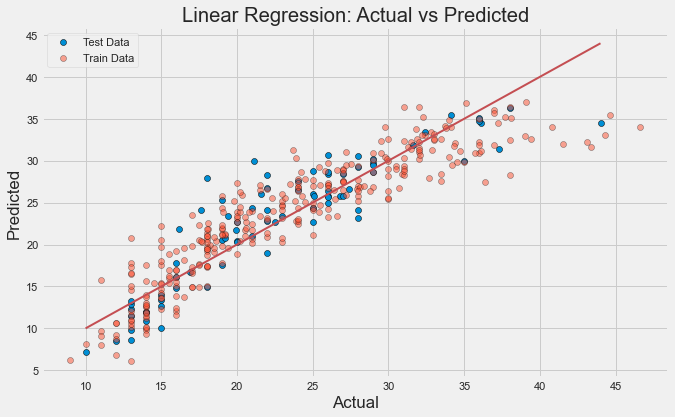

In [15]:
# Testing for overfit or underfit using linear regression
def linear_regression_intro(X_train, X_test, y_train, y_test):
    print("\n### Simple Linear Regression model ###")
    
    # Initialize and train the model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    
    # Evaluation
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"Training MSE: {train_mse}")
    print(f"Testing MSE: {test_mse}")
    print(f"Training R^2 Score: {train_r2}")
    print(f"Testing R^2 Score: {test_r2}")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0), label='Test Data')
    plt.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0), label='Train Data', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.legend()
    plt.show()

linear_regression_intro(X_train, X_test, y_train, y_test)


Training MSE: 10.979 

Testing MSE: 10.711

**Explanation**:  
The MSE (Mean Squared Error) for both the training and testing sets are close to each other. This indicates that the model's predictions are consistent across both datasets. If there was a large difference, it would suggest overfitting or underfitting.


Training R² Score: 0.826 

Testing R² Score: 0.790

**Explanation**:  
The R² score measures how well the model explains the variability of the target variable. Values are close for both sets, meaning the model generalizes well to unseen data. A high R² score indicates that the model explains a significant portion of the variance.


#### Conclusion:  
The model is neither overfitting nor underfitting, as evidenced by the similar MSE and R² scores for both training and testing sets. The model performs consistently and explains a good portion of the variance in the data.


## 5. Cross-Validation
Cross-validation is used to evaluate the model's performance by splitting the data into multiple folds and training/testing on different subsets. This helps in assessing the model's ability to generalize to unseen data.

In [16]:
# Cross-validation
def model_validation(X, y):
    print("\n### Model Validation ###")
    
    lr = LinearRegression()
    kf = KFold(n_splits=5)
    scores = cross_val_score(lr, X, y, cv=kf, scoring='r2')
    print(f"Cross-Validation R^2 Scores: {scores}")
    print(f"Mean Cross-Validation R^2 Score: {np.mean(scores)}")

X = df.drop(['mpg', 'car name'], axis=1)
X_transformed = ColumnTransformer(
    transformers=[
        ('log', FunctionTransformer(np.log1p, validate=True), ['displacement', 'horsepower', 'weight', 'acceleration']),
        ('onehot', OneHotEncoder(), ['origin'])
    ],
    remainder='passthrough'
).fit_transform(X)

y = df['mpg']
model_validation(X_transformed, y)



### Model Validation ###
Cross-Validation R^2 Scores: [0.53909658 0.7649111  0.83203731 0.7555265  0.261895  ]
Mean Cross-Validation R^2 Score: 0.6306932971799519


Individual Scores: [0.539, 0.765, 0.832, 0.756, 0.262]

Mean Cross-Validation R² Score:
**Average: 0.631**


**Explanation**:

The R² scores vary across the different folds, indicating some variability in model performance depending on the data split. 

The average R² score of 0.631 suggests that the model moderately explains the variance in the target variable. There is room for improvement in model performance.


## 6. Regularization using Ridge and Lasso Regression
We define a function regularization to train and evaluate Ridge and Lasso regression models. These regularization techniques help in preventing overfitting by adding penalty terms to the loss function. We evaluate the models using R^2 scores or other metrics MSE.

In [17]:
# Regularization: Ridge and Lasso Regression
def regularization(X_train, X_test, y_train, y_test):
    print("\n### Regularization: Ridge and Lasso Regression ###")
    
    # Ridge Regression
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    print(f"Ridge Regression R^2 Score: {r2_score(y_test, ridge_pred)}")
    
    # Lasso Regression
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    print(f"Lasso Regression R^2 Score: {r2_score(y_test, lasso_pred)}")

regularization(X_train, X_test, y_train, y_test)



### Regularization: Ridge and Lasso Regression ###
Ridge Regression R^2 Score: 0.7903083415275747
Lasso Regression R^2 Score: 0.7893046460847541


### Simple Linear Regression:
- **Training R² Score**: 0.826
- **Testing R² Score**: 0.790
- **Mean Cross-Validation R² Score**: 0.631

### Ridge Regression R² Score:
- **Testing**: 0.790

### Lasso Regression R² Score:
- **Testing**: 0.789

### **Summary**:

- **Performance**: Ridge and Lasso regression have similar R² scores to simple linear regression, indicating comparable predictive performance.

- **Overfitting**: Regularization helps reduce overfitting by adding penalties, thus creating more stable models.

### **Conclusion**:  
While R² improvements are minimal, regularization enhances model robustness and stability.
